In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

### Init

In [2]:
df = pd.read_csv("dataset_SCL.csv")
display(df.head(5))

c:\users\bldr1\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [3]:
# Formatear datos de fecha

df["Fecha-I"] = df["Fecha-I"].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S'))
df["Fecha-O"] = df["Fecha-O"].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S'))

In [4]:
# Calcular dia, mes, año, day of week, hora a partir de las fechas

df["DIA-I"] = df["Fecha-I"].dt.day
df["MES-I"] = df["Fecha-I"].dt.month
df["AÑO-I"] = df["Fecha-I"].dt.year
df["DOW-I"] = df["Fecha-I"].dt.weekday + 1 # Lunes es 1, domingo es 7
df["Hour-I"] = df["Fecha-I"].dt.hour
df["WEEKOFYEAR-I"] = df["Fecha-I"].dt.week # Week Of Year


df["DIA-O"] = df["Fecha-O"].dt.day
df["MES-O"] = df["Fecha-O"].dt.month
df["AÑO-O"] = df["Fecha-O"].dt.year
df["DOW-O"] = df["Fecha-O"].dt.weekday + 1 # Lunes es 1, domingo es 7
df["Hour-O"] = df["Fecha-O"].dt.hour
df["WEEKOFYEAR-I"] = df["Fecha-O"].dt.week # Week Of Year

# P1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

### Cuántos vuelos componen el dataset?

El dataset está compuesto por 68.206 vuelos

In [5]:
print("Cantidad de vuelos: ", df.shape[0])

Cantidad de vuelos:  68206


### Hay missing values?

Hay solo un missing value en todo el dataset. Por lo que se puede eliminar.

In [6]:
print("Total de missing values: ", df.isnull().sum().sum() )

"""
Debido a que hay solo 1 valor nulo en todo el dataset lo podemos eliminar
"""
df = df.dropna()

Total de missing values:  1


### Qué periodo abarca el dataset?

Todo el año 2017

In [7]:
print("Fecha programada")
print("Más antigua:", df["Fecha-I"].min())
print("Más reciente:", df["Fecha-I"].max())

Fecha programada
Más antigua: 2017-01-01 00:15:00
Más reciente: 2017-12-31 23:55:00


### Cuáles son los aeropuertos de origen?

Todos los vuelos tienen origen en Santiago

In [8]:
display( df["Ori-I"].value_counts() )

SCEL    68205
Name: Ori-I, dtype: int64

### Cuáles son los aeropuestos de destino?

Hay 64 aeropuertos de destino, 17 de ellos concentran el 80% del tráfico aereo.

In [9]:
def pareto_chart(df, col):
    fig, ax = plt.subplots(figsize=(15,5))
    plt.title(f"Distribución por {col}")
    plt.xticks(rotation=90)
    ax.bar(df[col].value_counts().index, df[col].value_counts().values)
    ax2 = ax.twinx()
    ax2.plot(df[col].value_counts().index, df[col].value_counts().cumsum() / df.shape[0])
    ax2.axhline(0.8, color = 'r')
    plt.show()

In [10]:
print("Aeropuertos únicos: " , df["Des-I"].nunique() )

Aeropuertos únicos:  64


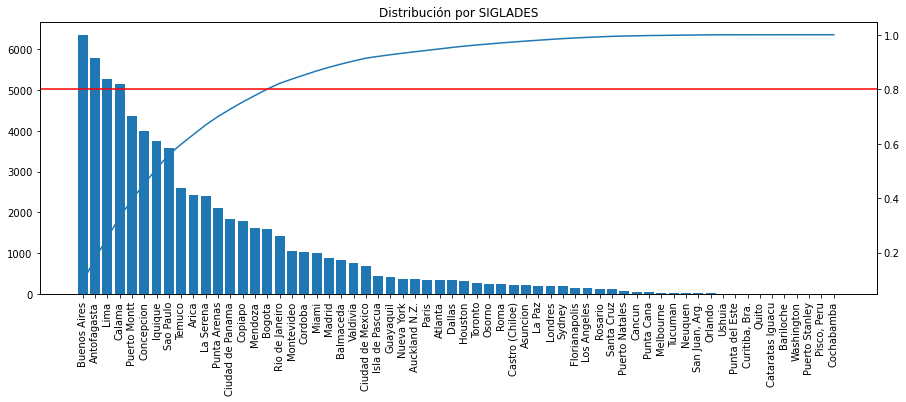

In [11]:
pareto_chart(df, "SIGLADES")

### ¿Cuáles son las operadoras?
 
Hay 23 operadoras de vuelos, pero 2 de ellas: Grupo LATAM y Sky Airline acumulan más del 80% del tráfico

In [12]:
print("Operadoras únicos: " , df["OPERA"].nunique() )

Operadoras únicos:  23


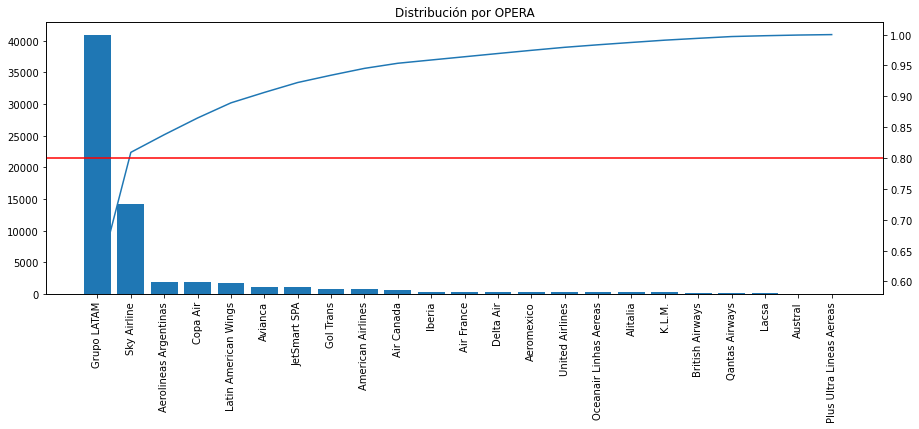

In [13]:
pareto_chart(df, "OPERA")

### ¿Cómo es la distribución por meses?
 
A partir de febrero los vuelos empiezan a bajar y en julio comienza una tendencia al alza

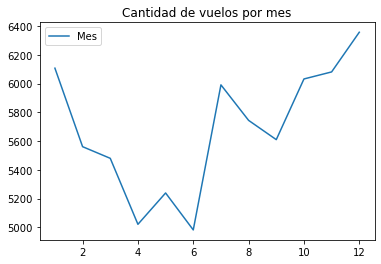

In [14]:
meses = df.groupby("MES-I")["MES-I"].count()

plt.title("Cantidad de vuelos por mes")
plt.plot(meses.index, meses.values, label="Mes")
plt.legend()
plt.show()

### ¿Cómo es la distribución por dia de semana?
 
De domingo a lunes hay más de 9.000 vuelos y los días sábados baja a 8.300

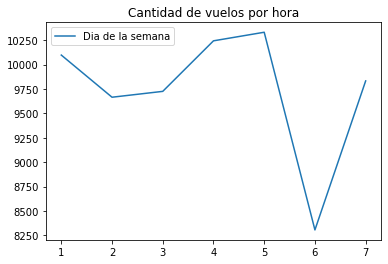

In [15]:
dow = df.groupby("DOW-I")["DOW-I"].count()

plt.title("Cantidad de vuelos por hora")
plt.plot(dow.index, dow.values, label="Dia de la semana")
plt.legend()
plt.show()

### Cómo es la distribución por hora?

Desde las 5AM hasta las 19PM la cantidad de vuelos es cercana a los 4.000 mientras que en la noche baja a valores cercanos a 1.000

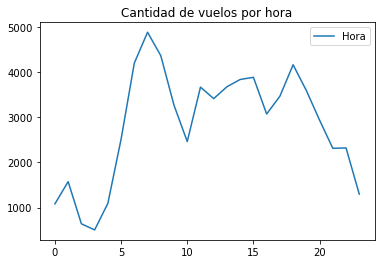

In [16]:
hour = df.groupby("Hour-I")["Hour-I"].count()

plt.title("Cantidad de vuelos por hora")
plt.plot(hour.index, hour.values, label="Hora")
plt.legend()
plt.show()

# P2. Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv

In [17]:
df["temporada_alta"] =  (("2016-12-15" <= df["Fecha-I"]) & (df["Fecha-I"] <= "2017-03-03")) | \
                        (("2017-07-15" <= df["Fecha-I"]) & (df["Fecha-I"] <= "2017-07-31")) | \
                        (("2017-09-11" <= df["Fecha-I"]) & (df["Fecha-I"] <= "2017-09-30")) | \
                        (("2017-12-15" <= df["Fecha-I"]) & (df["Fecha-I"] <= "2018-03-03"))

df["temporada_alta"] = df["temporada_alta"].astype(int)

In [18]:
def get_periodo_dia(x):
    if 5 <= x < 12:
        return "mañana"
    elif 12 <= x < 19:
        return "tarde"
    else:
        return "noche"
    
def get_estacion(x):
    if x in [12, 1, 2]:
        return "verano"
    elif x in [3,4,5]:
        return "otoño"
    elif x in [6,7,8]:
        return "invierno"
    else:
        return "primavera"
    


df["diff_min"] = (df["Fecha-O"] - df["Fecha-I"]).dt.seconds / 60
df["atraso_15"] = (df["diff_min"] > 15).astype(int)
df["periodo_dia"] = df["Hour-I"].apply(lambda x: get_periodo_dia(x))
df["estacion-I"] = df["MES-I"].apply(lambda x: get_estacion(x))

df.to_csv("syntehtic_features.csv", index=False, sep="|")

# P3. ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo? ¿Qué variables esperarías que más influyeran en predecir atrasos?

### Cómo distribuye diff_min?

* Hay dos cluster, el primero con delays menores a 400 minutos y luego hay outliers con delays en torno a los 1300 minutos (>20 horas)
* El target "atraso_15" tiene una distribución cercana al 50% para cada clase, es decir, cerca del 50% de los vuelos llega con un atraso mayor a 15 minutos

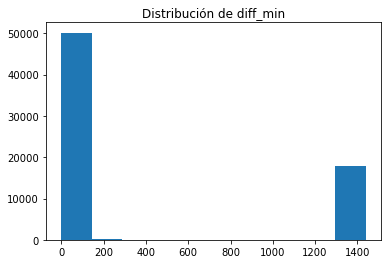

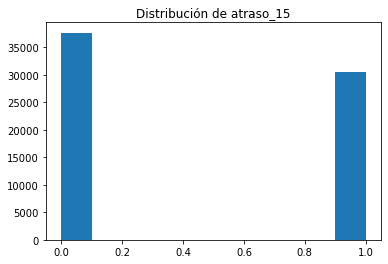

Cantidad de vuelos con delays menores a 400 minutos:  50295
Cantidad de vuelos con delays superiores a 400 minutos:  17910


In [19]:
plt.title("Distribución de diff_min")
plt.hist(df["diff_min"])
plt.show()

plt.title("Distribución de atraso_15")
plt.hist(df["atraso_15"])
plt.show()

print("Cantidad de vuelos con delays menores a 400 minutos: ", (df["diff_min"] < 400).sum() )
print("Cantidad de vuelos con delays superiores a 400 minutos: ", (df["diff_min"] >= 400).sum() )

### ¿Hay estacionalidad en diff_min?
 
* De la temporalidad diff min se puede ver que hay una estacionalidad en el promedio de atrasos de los vuelos. Este ciclo eventualmente se podría modelar con ARIMA o similares. Hay que destacar que en marzo donde el 50% de los vuelos tuvieron un atraso mayor a 800 minutos, es posible que esto sea una falla generalizada en la operación del aeropuerto como una huelga, emergencia, etc.
* Del gráfico de la temporalidad de los vuelos que tienen más de 15 minutos de gráficos, también se ve que hay cierta estacionalidad donde hay una tendencia a la baja entre marzo y julio para luego comenzar a subir.

In [20]:
def date_from_values(x, ano="AÑO-I", mes="MES-I", dia="DIA-I"):
    date = f"{x[ano]}-{x[mes]}-{x[dia]}" 
    return datetime.strptime(date, '%Y-%m-%d')
    
def date_from_ymd(df, ano="AÑO-I", mes="MES-I", dia="DIA-I"):
    "Crear una columna de fecha a partir de columnas de año, mes y dia"
    df = df.copy()
    df["DATE"] = df[[ano, mes, dia]].apply(lambda x: date_from_values(x, ano="AÑO-I", mes="MES-I", dia="DIA-I"), axis=1)
    return df

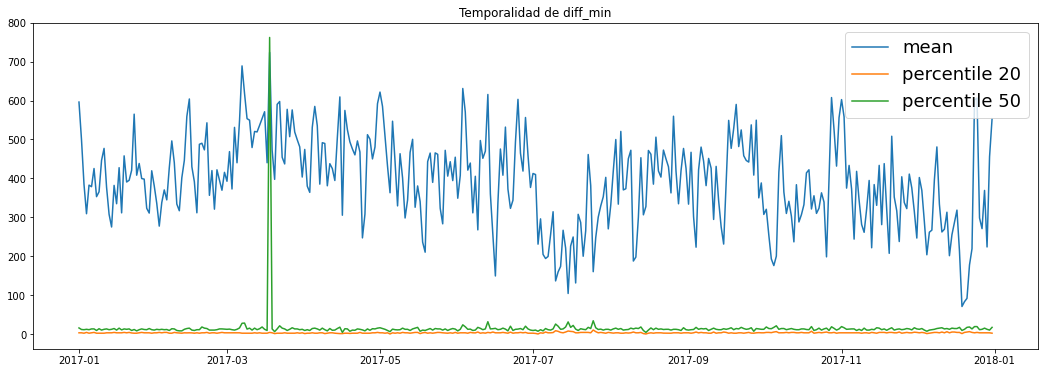

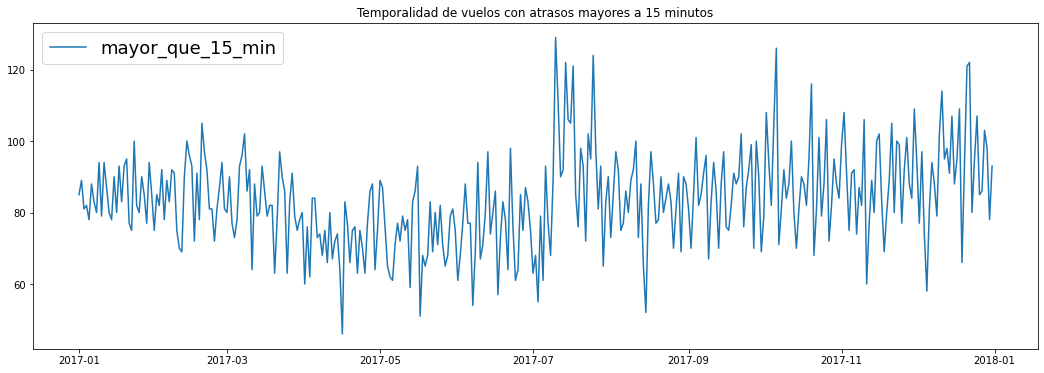

In [21]:
temporality = df.groupby(by=["AÑO-I","MES-I", "DIA-I"]).agg({
                                                            "diff_min":["mean",
                                                                        lambda x: np.percentile(x, q = 5),
                                                                        lambda x: np.percentile(x, q = 20),
                                                                        lambda x: np.percentile(x, q = 50),
                                                                        lambda x: np.percentile(x, q = 70),
                                                                        lambda x: np.percentile(x, q = 95),
                                                                        lambda x: np.sum(x>15)
                                                                       ]
                                                            })
temporality.columns = ["diff_mean", "diff_q5", "diff_q20", "diff_q50", "diff_q70", "diff_q95", "mayor_que_15_min"]
temporality = temporality.reset_index()
temporality = date_from_ymd(temporality)

# Plot distribución diff_min
# Los percentiles más altos saltan a los 1400 minutos, por lo tanto, ensucian el gráfico
plt.subplots(figsize=(18,6))
plt.title("Temporalidad de diff_min")
plt.plot(temporality["DATE"], temporality["diff_mean"], label = "mean")
plt.plot(temporality["DATE"], temporality["diff_q20"], label = "percentile 20") # percentile 20
plt.plot(temporality["DATE"], temporality["diff_q50"], label = "percentile 50") # percentile 50
plt.legend(fontsize=18)
plt.show()

# Plot conteo de vuelos donde diff_min > 15 min
plt.subplots(figsize=(18,6))
plt.title("Temporalidad de vuelos con atrasos mayores a 15 minutos")
plt.plot(temporality["DATE"], temporality["mayor_que_15_min"], label = "mayor_que_15_min") # percentile 70
plt.legend(fontsize=18)
plt.show()



### Tasa de atraso por variable
 
* Del gráfico por mes se puede ver que hay hasta un 3% de diferencia en la tasa de atraso. Enero, febrero y abril son los que tienen las menores tasas de atraso.
* El gráfico por día tiene diferencias de hasta un 5% en la tasa de atraso. El día 5 es el que tiene menor tasa de atraso y el 15 el que tiene mayor. 
* El gráfico por hora muestra que entre las 7AM y 7PM hay menores tasas de atraso que en el resto de los horarios.
* El gráfico de la semana por año se ve que hay semanas como la 10 o 29 donde la tasa de atrasos supera el 50% así como las semanas 15 y 27 donde la tasa de atraso llega a menos del 40%
* El gráfico del día de la semana muestra que el miércoles y viernes tienen las menores tasas de atrasos.
* El gráfico de las operadoras muestra que hay diferencias significativas entre ellas, por ejemplo, United Airlines tiene una tasa de atraso del 80% contra Grupo Latam que tiene una tasa de atrasos menor al 50%. Hay que destacar, que LATAM es el que controla la mayor cantidad de tráfico aéreo.
* El gráfico por destino muestra que hay diferencias entre los destinos, por ejemplo Dallas y Houston tasas de atraso del 80% vs Punta Arenas y Balmaceda que tienen tasas de atraso del 30%. Todos los destinos con valores cercanos a 1% o 0% son aquellos que tienen muy pocos datos.
* De acuerdo al tipo de vuelo, los nacionales tienen menor tasa de atraso que los internacionales.
* Un atributo que sin duda afecta la operación de los vuelos es el clima. Desafortunadamente no encontré una fuente de datos disponibles con el clima a cada hora del 2017 para santiago. Por este motivo cree la variable estación (verano, invierno, etc). La temporada de verano es la que tiene menores tasas de atraso e invierno la que más atrasos presenta (peor clima).
* Para el periodo del día se tiene que la noche tiene 6% más tasa de atrasos que la mañana y la tarde
 
<br>
Otros elementos que posiblemente influyan, es el tamaño del avión, la cantidad de pasajeros, la tasa de ocupación del aeropuerto, si el avión del vuelo viene desde un vuelo anterior, si es escala, etc.

In [22]:
def categorical_plot(df, hue, y):
    data = {}
    
    for flag in df[y].unique():
        data[flag] = []
        
        values = np.sort( df[hue].unique() )
        for value in values:
            rows = df[(df[hue] == value) & (df[y] == flag)].shape[0]
            total = df[(df[hue] == value)].shape[0]
            data[flag].append( rows/total )
            
    " To replace numbers by text"
    mask = {}
    for i, value in enumerate(np.sort(df[hue].unique())):
        mask[i] = str(value)
        
    plt.subplots(figsize=(18,6))
    for flag in data.keys():
        if flag == 1:
            plt.plot( np.asarray(data[flag]), label=f"Clase {flag}", marker="o")
    
    plt.legend()
    plt.title(f"Categorical: Distribución por {hue}", size=18)
    plt.xlabel(f"{hue}", size=15)
    plt.ylabel(f"{y}", size=15)
    plt.xticks(list(mask.keys()), list(mask.values()), rotation=90, size=18)
    plt.show()

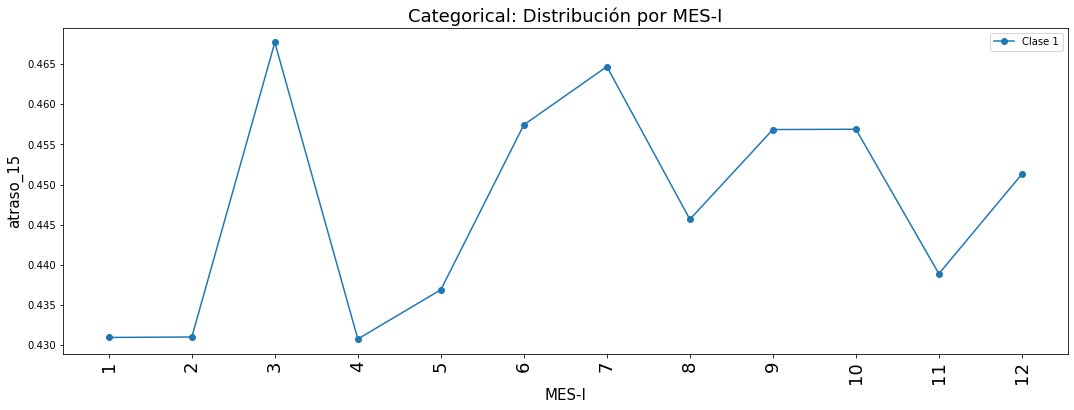

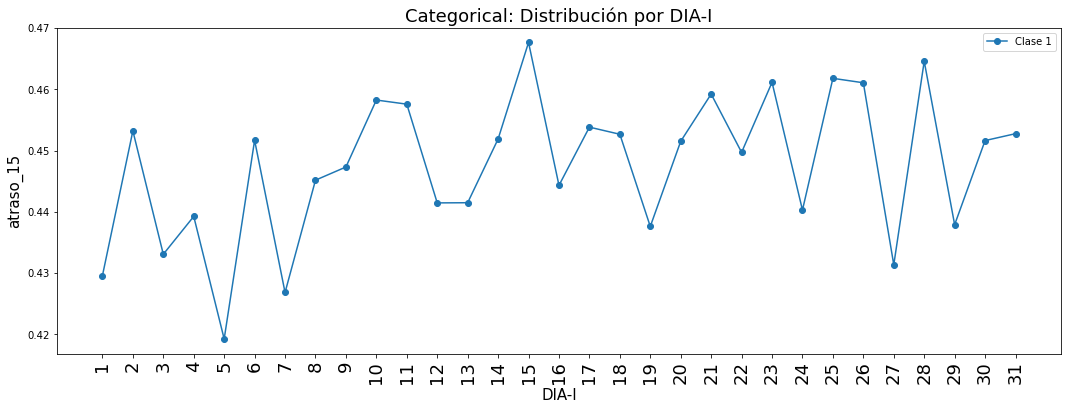

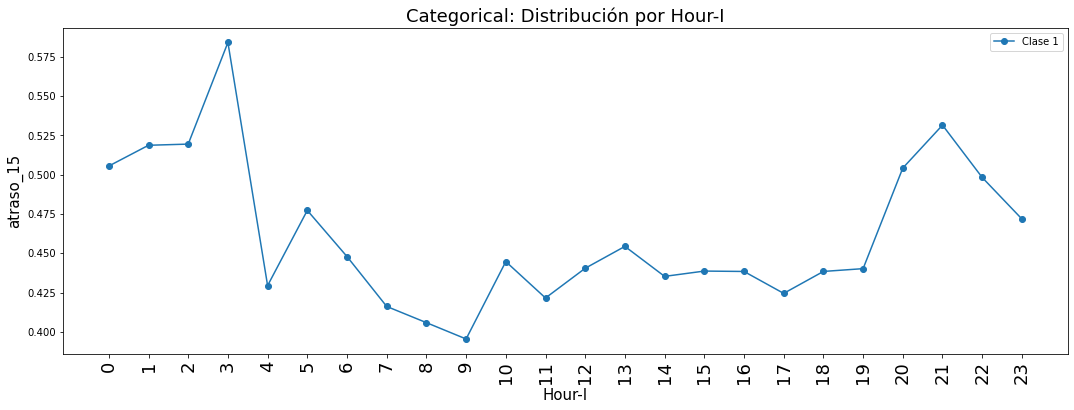

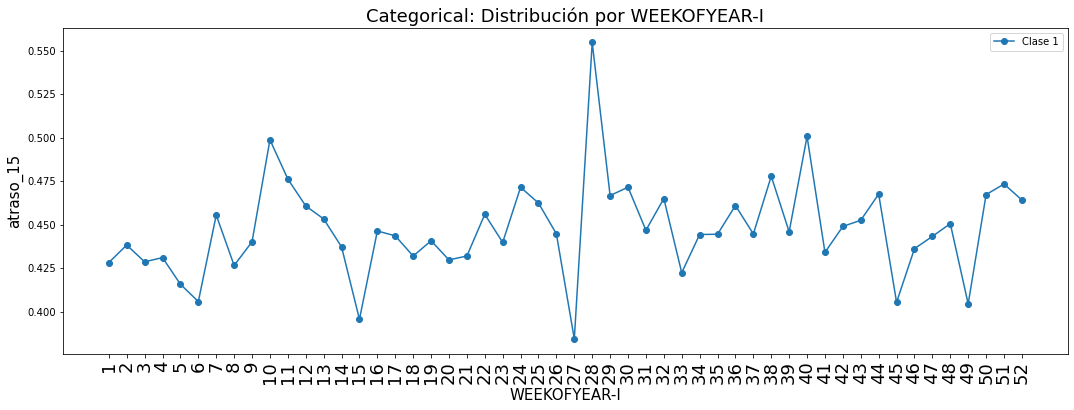

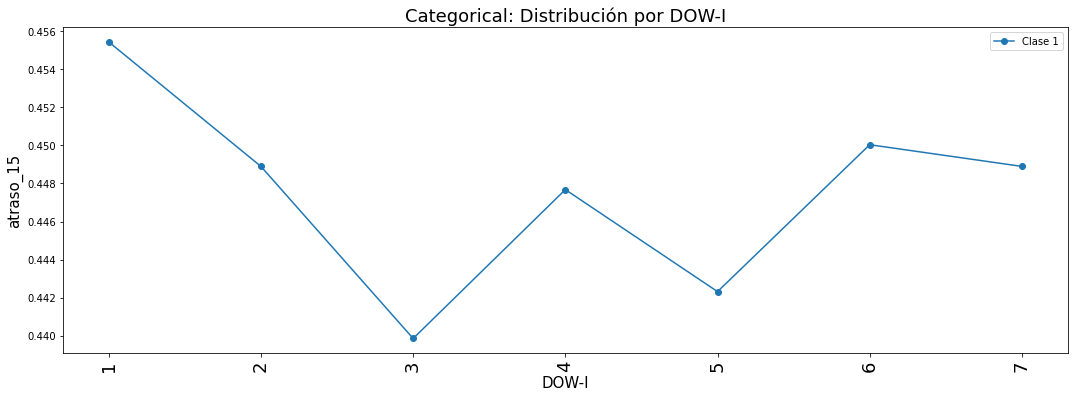

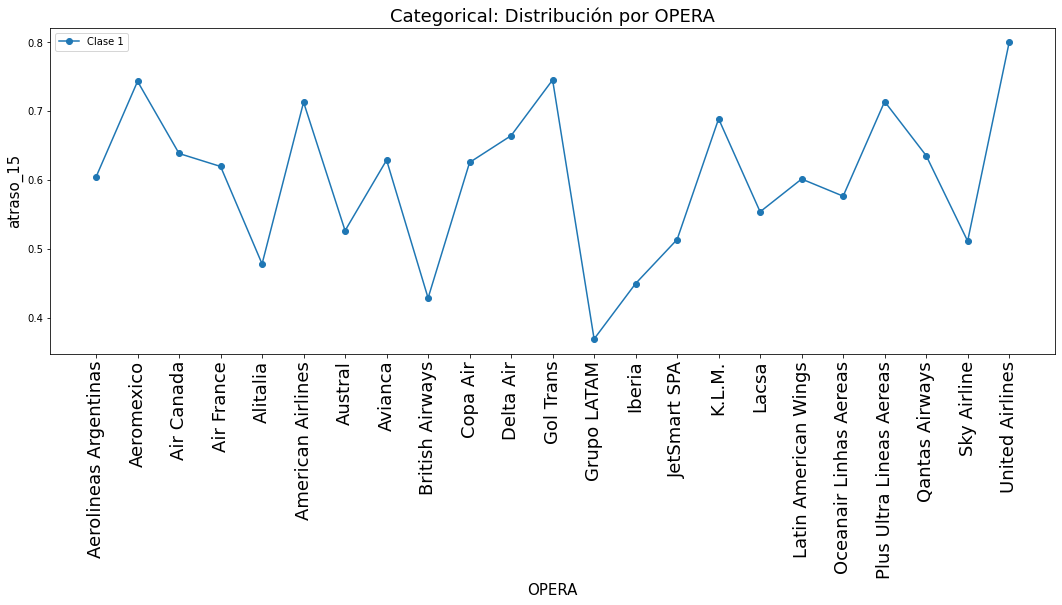

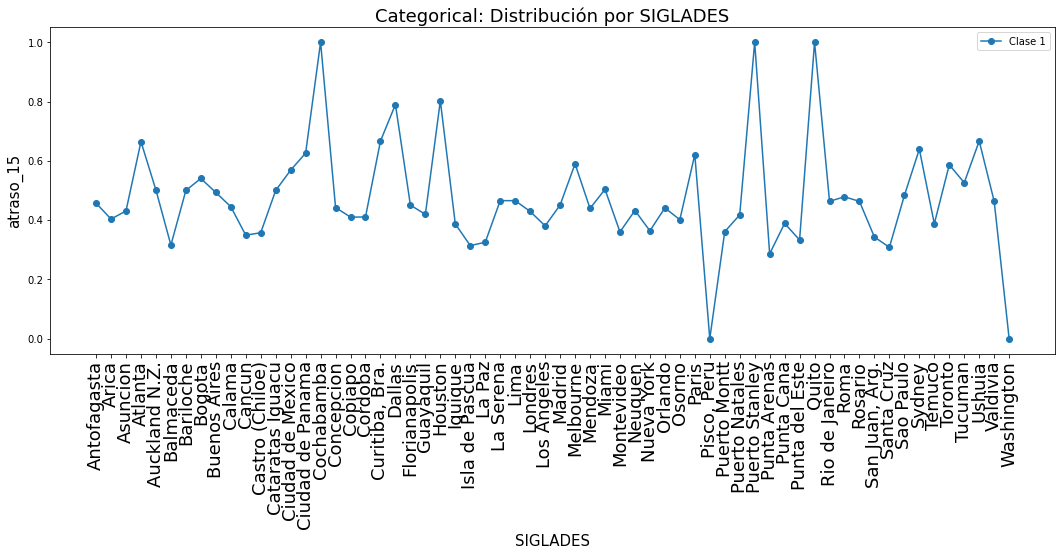

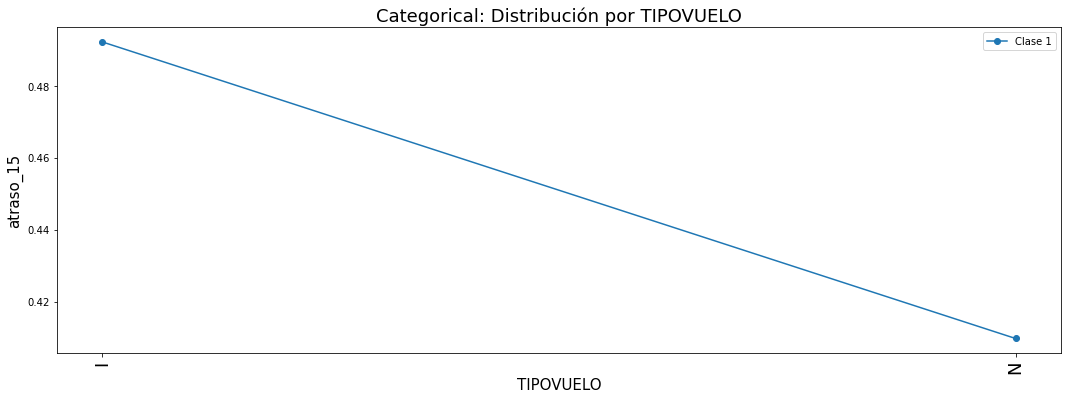

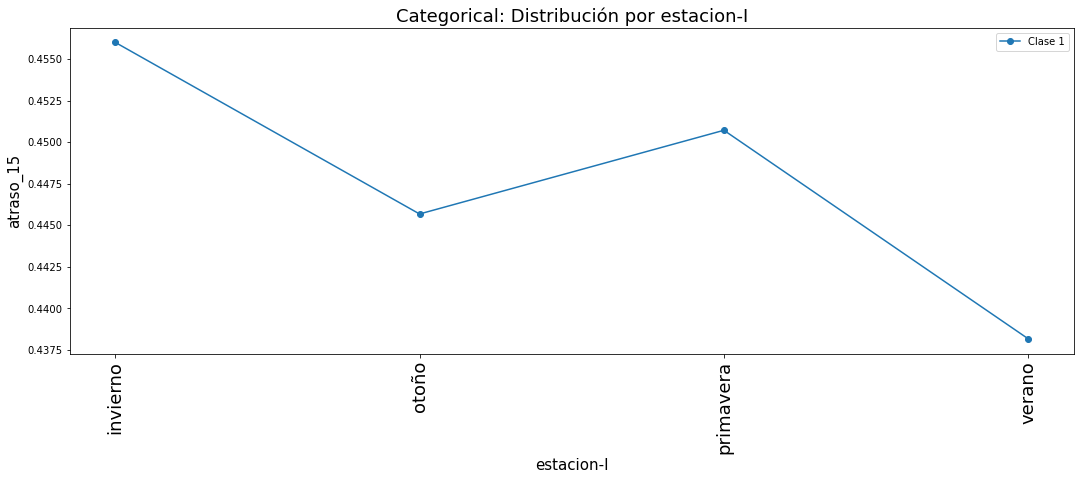

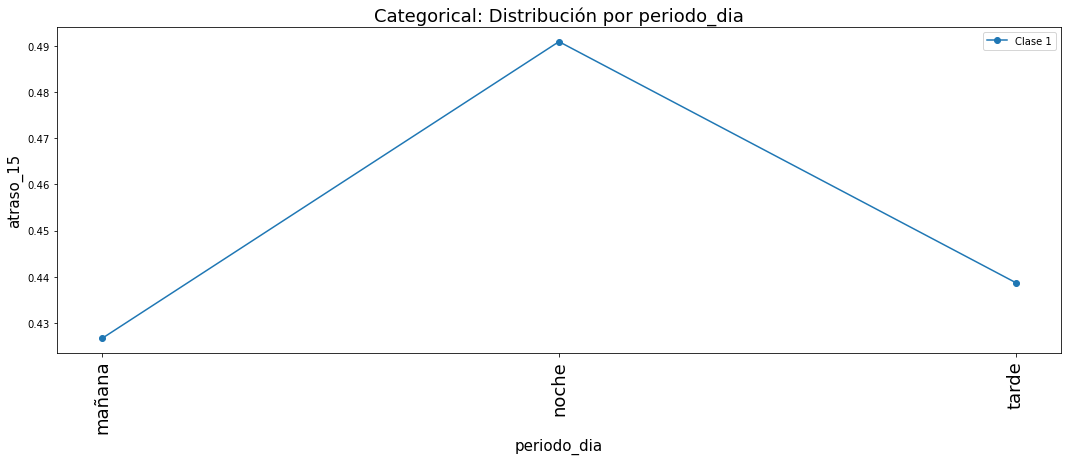

In [23]:
categorical_plot(df, hue="MES-I", y="atraso_15")
categorical_plot(df, hue="DIA-I", y="atraso_15")
categorical_plot(df, hue="Hour-I", y="atraso_15")
categorical_plot(df, hue="WEEKOFYEAR-I", y="atraso_15")
categorical_plot(df, hue="DOW-I", y="atraso_15")
categorical_plot(df, hue="OPERA", y="atraso_15")
categorical_plot(df, hue="SIGLADES", y="atraso_15")
categorical_plot(df, hue="TIPOVUELO", y="atraso_15") 
categorical_plot(df, hue="estacion-I", y="atraso_15") 
categorical_plot(df, hue="periodo_dia", y="atraso_15") 

### Exportar datos útiles

In [24]:
COLS_TO_USE = ["atraso_15","MES-I" ,"DIA-I", "Hour-I", "WEEKOFYEAR-I","DOW-I","OPERA","SIGLADES", "TIPOVUELO", "estacion-I", "periodo_dia"]
data = df[COLS_TO_USE]
data.to_csv("data.csv", index=False, sep="|")